In [639]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

LOADING THE DATA ⏳

In [640]:
# Firsly, load the dataset
dataset = pd.read_csv('Iris.csv')
dataset.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [641]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [642]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [643]:
dataset.drop('Id', axis=1, inplace=True)

EXPLORATORY DATA ANALYSIS (EDA) 📈📊

In [644]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [645]:
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

<Axes: >

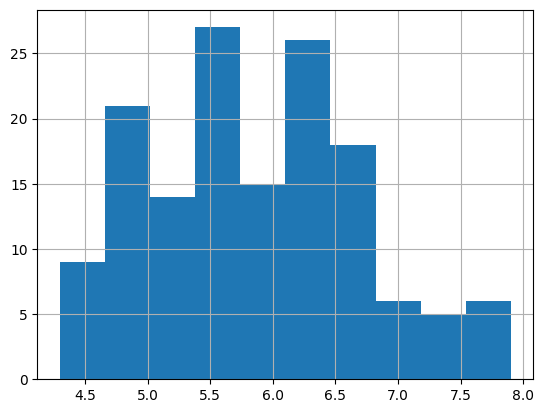

In [646]:
#Histograms of the dataset
dataset['SepalLengthCm'].hist()

<Axes: >

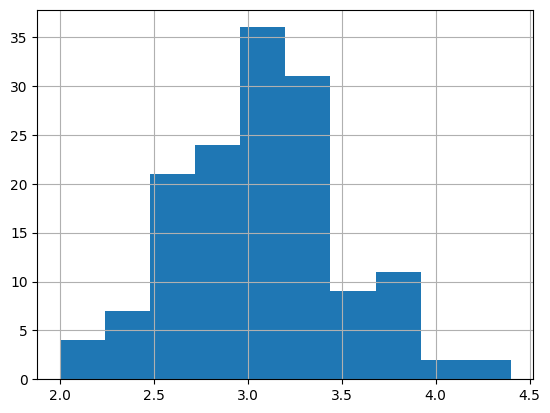

In [647]:
dataset['SepalWidthCm'].hist()

<Axes: >

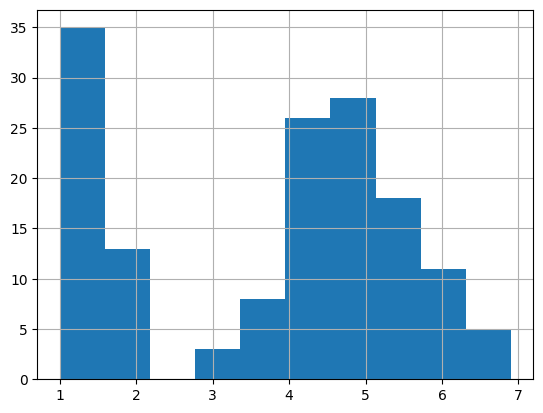

In [648]:
dataset['PetalLengthCm'].hist()

<Axes: >

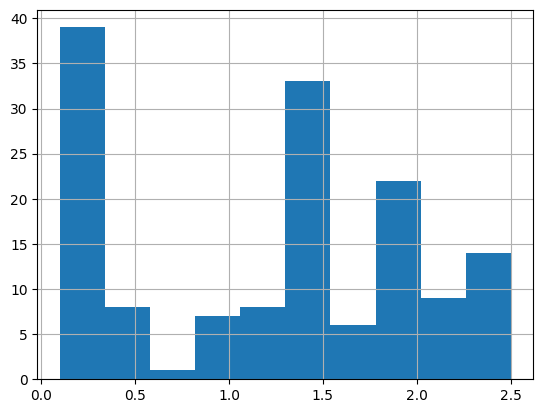

In [649]:
dataset['PetalWidthCm'].hist()

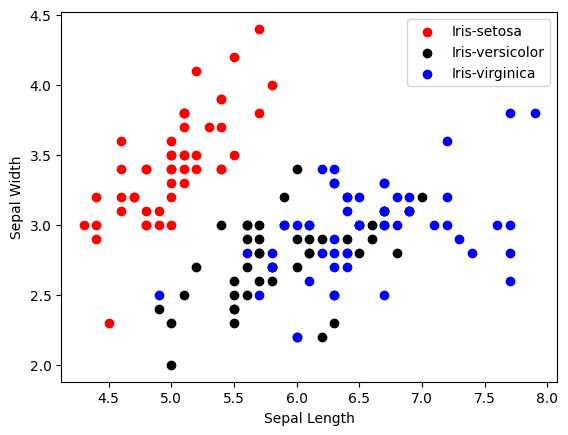

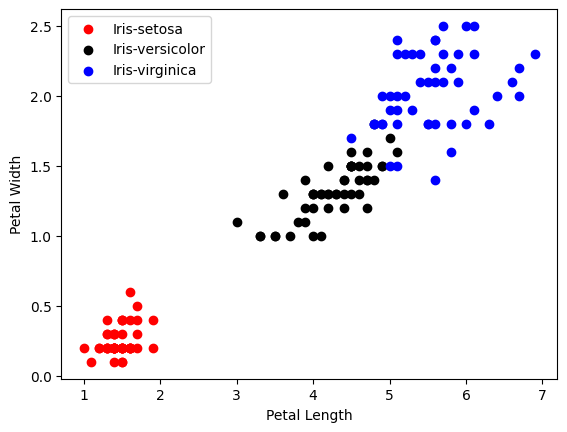

In [650]:
#Scatter plots
color_of_classes = ['red', 'black', 'blue']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    feature = dataset[dataset['Species'] == classes[i]]
    plt.scatter(feature['SepalLengthCm'], feature['SepalWidthCm'], color=color_of_classes[i], label=classes[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

for i in range(3):
    feature = dataset[dataset['Species'] == classes[i]]
    plt.scatter(feature['PetalLengthCm'], feature['PetalWidthCm'], color=color_of_classes[i], label=classes[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

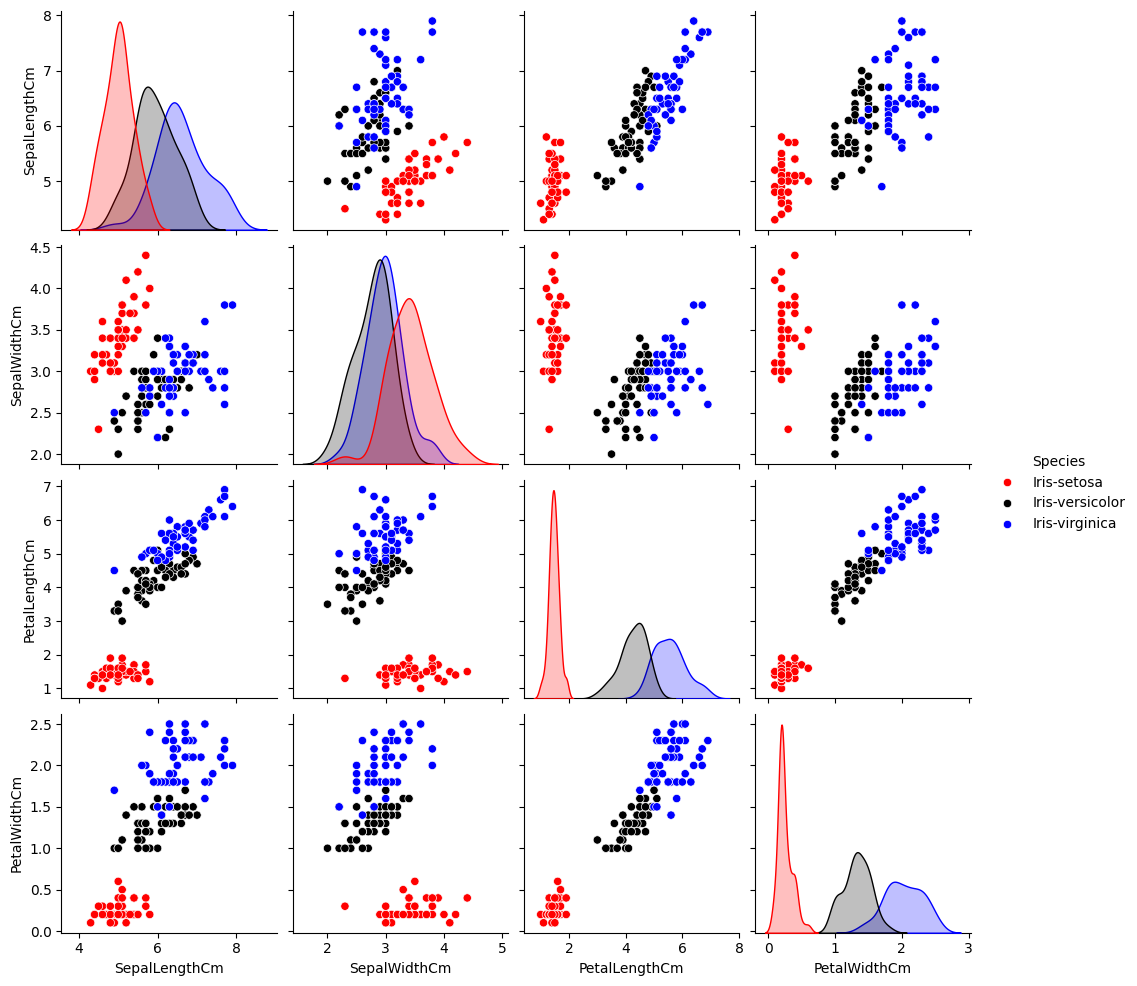

In [651]:
sns.pairplot(dataset, hue='Species', palette={'Iris-setosa': 'red', 'Iris-versicolor': 'black', 'Iris-virginica': 'blue'})

In [652]:
#label encoder 
label_encoder = LabelEncoder()
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])
dataset.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [653]:
#now, correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


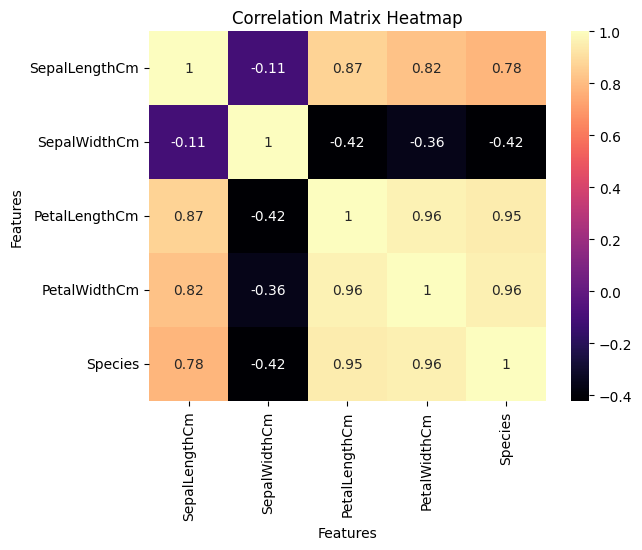

In [654]:
#heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

TRAINING THE MODEL 🏋💪

In [655]:
X = dataset.drop('Species', axis=1)
Y = dataset['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# scaling the data by standardization
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [656]:
#training on dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
dataset.shape

(147, 5)

In [657]:
#predicting the test set
Y_original = Y_test.values
print('Original values of the test set: ', Y_original, '\n')
Y_pred = model.predict(X_test)
print('Prediction Values of the model: ', Y_pred, '\n')
#accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model: ', accuracy * 100, '%')


Original values of the test set:  [2 1 2 0 2 0 1 0 1 0 0 1 2 1 2 1 0 1 2 0 0 2 0 2 1 0 1 2 1 0] 

Prediction Values of the model:  [2 1 2 0 1 0 1 0 2 0 0 1 2 1 2 1 0 1 2 0 0 2 0 2 1 0 1 2 1 0] 

Accuracy of the model:  93.33333333333333 %


CLASSIFICATION REPORT AND CONFUSION MATRIX ALONG WITH EVALUATION METRICSS 🗿

In [658]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define scoring metrics
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))),
    'r2': 'r2'
}

# Perform cross-validation with detailed results
cv_results = cross_validate(model, X, Y, cv=10, 
                          scoring=scoring,
                          return_train_score=True,
                          return_estimator=True)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame({
    'Fold': range(1, 11),
    'Train R2': cv_results['train_r2'],
    'Test R2': cv_results['test_r2'],
    'Train RMSE': np.sqrt(-cv_results['train_neg_mse']),
    'Test RMSE': np.sqrt(-cv_results['test_neg_mse']),
    'Train MSE': -cv_results['train_neg_mse'],
    'Test MSE': -cv_results['test_neg_mse']
})

# Print detailed results for each fold
print("\nDetailed Cross-Validation Results for Each Fold:")
print(results_df.to_string(index=False))

# Print averages
print("\nAverage Scores Across All Folds:")
print(f"Average Training R2: {cv_results['train_r2'].mean():.4f}")
print(f"Average Validation R2: {cv_results['test_r2'].mean():.4f}")
print(f"Average Training RMSE: {np.sqrt(-cv_results['train_neg_mse']).mean():.4f}")
print(f"Average Validation RMSE: {np.sqrt(-cv_results['test_neg_mse']).mean():.4f}")
print(f"Average Training MSE: {-cv_results['train_neg_mse'].mean():.4f}")
print(f"Average Validation MSE: {-cv_results['test_neg_mse'].mean():.4f}")

# Optionally: You can also access each trained model from the folds
# cv_results['estimator'] contains the 5 trained models


Detailed Cross-Validation Results for Each Fold:
 Fold  Train R2  Test R2  Train RMSE  Test RMSE  Train MSE  Test MSE
    1  0.954019      1.0    0.174078   0.000000   0.030303  0.000000
    2  0.954019      0.9    0.174078   0.258199   0.030303  0.066667
    3  0.954019      1.0    0.174078   0.000000   0.030303  0.000000
    4  0.954019      1.0    0.174078   0.000000   0.030303  0.000000
    5  0.965514      0.9    0.150756   0.258199   0.022727  0.066667
    6  0.965514      0.9    0.150756   0.258199   0.022727  0.066667
    7  0.977009      0.9    0.123091   0.258199   0.015152  0.066667
    8  0.954530      1.0    0.173422   0.000000   0.030075  0.000000
    9  0.965909      1.0    0.150188   0.000000   0.022556  0.000000
   10  0.965909      1.0    0.150188   0.000000   0.022556  0.000000

Average Scores Across All Folds:
Average Training R2: 0.9610
Average Validation R2: 0.9600
Average Training RMSE: 0.1595
Average Validation RMSE: 0.1033
Average Training MSE: 0.0257
Average 

/Users/Sohaib's Macbook Air/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Sohaib's Macbook Air/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [659]:
# time to make classification report
model_report = classification_report(Y_test, Y_pred, target_names=label_encoder.classes_)
print('Classification report of the above model\n\n', model_report)

Classification report of the above model

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



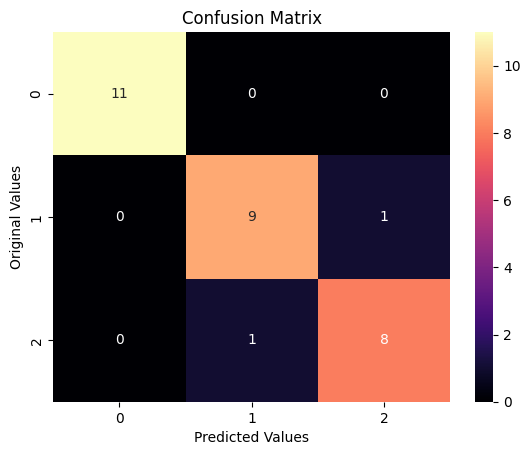

In [660]:
#confusion matrix 
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_matrix_result, annot = True, cmap = 'magma')
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.title('Confusion Matrix')
plt.show()

In [661]:
import joblib as jl
jl.dump(model, 'logistic_regression_model.pkl')
jl.dump(label_encoder, 'iris_encoder.pkl')
jl.dump(standard_scaler, 'scaler.pkl')

['scaler.pkl']